In [9]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
from keras import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test, y_test) = mnist.load_data()

In [10]:
print(X.shape) 
print(y.shape)
print(X_test.shape) 
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [11]:
X = X.reshape(60000, 784).astype('float32') / 255.0

In [12]:
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [13]:
y = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

In [14]:
model = Sequential()

In [15]:
model.add(Dense(input_dim=784, activation="relu", units=64)) 

In [16]:
model.add(Dense(activation="softmax", units=10))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [18]:
model.fit(X, y, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6797 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3508 - accuracy: 0.9015
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3052 - accuracy: 0.9133
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2774 - accuracy: 0.9221
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9282


In [19]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 0s 892us/step - loss: 0.2404 - accuracy: 0.9316


In [20]:
print("손실 및 정확도:", str(loss_and_metrics ))

손실 및 정확도: [0.2404162585735321, 0.9315999746322632]


In [21]:
a = X_test[0:1]                
b = model.predict_classes(a)  
print("결과: ")
print(b)
b = model.predict(a)              
print("각 숫자에 대한 가능성:")
print(b)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
결과: 
[7]
각 숫자에 대한 가능성:
[[9.12740943e-05 2.95975667e-07 1.81920201e-04 1.93116558e-03
  6.90024126e-06 7.27128208e-05 1.07893314e-07 9.96702731e-01
  6.43604290e-05 9.48689179e-04]]


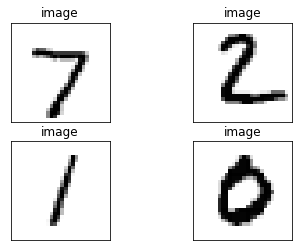

In [22]:
fig = plt.figure()  

for i in range(1, 5):   
    subplot = fig.add_subplot(2, 2, i)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('image')  
    subplot.imshow(X_test[i-1].reshape((28,28)), cmap=plt.cm.gray_r)

plt.show()